In [238]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random as rd

In [239]:
x = [0.8, 0.6, 0.4, 2]
norm_x = np.array(x)/np.sum(x)
p = np.cumsum(x)
sample = p.searchsorted(np.random.uniform(0, 1))

In [88]:
#interarrival time for a city bus has exponential distribution with parameter 1/lambda.

In [138]:
def sample_exp_dist(lmbda=1/10):
    p = rd.random()
    return -(1/lmbda)*np.log(1-p)

In [143]:
def simulate_waiting_time(lmbda=1/10, sims=10000):
    waiting_time = []
    waiting_time2 = []
    for i in range(sims):
        waiting_time.append(sample_exp_dist(lmbda))
        waiting_time2.append(scipy.random.exponential(1/lmbda))
    return waiting_time, waiting_time2

In [197]:
W,W2 = simulate_waiting_time()
print(np.mean(W),np.mean(W2))

10.053768131660382 10.044258955595845


In [204]:
def simulate_waiting_time_U(lmbda=1/10, sims=10000):
    waiting_time = []
    waiting_time2 = []
    for i in range(sims):
        rate = rd.uniform(0,2*lmbda)
        waiting_time.append(sample_exp_dist(rate))
        waiting_time2.append(scipy.random.exponential(1/rate))
    return waiting_time, waiting_time2

In [205]:
W_U, W2_U = simulate_waiting_time_U()
print(np.mean(W_U),np.mean(W2_U))

41.997487978135084 38.82094431654302


When the interarrival time is fixed at 0.1, the expected wait time is 10 (1/(1/10)). This is not that surprising after reading about the Waiting Time Paradox.

Now, when the interarrival time is drawn from U(0,0.2), even though the expected interarrival time is still 0.1, now the average wait time becomes much larger (4 times larger than when the intearrival time was fixed), this is likely because of the nature of the exponential distribution, now that we can have values up to twice as big as the fixed lambda, the squared value of that is 4 times larger. I believe it is related that the wait time is 4 times larger in that case then.

In [206]:
data = {
    50: 0.00832,
    51: 0.00911,
    52: 0.00996,
    53: 0.01089,
    54: 0.01190,
    55: 0.01300,
    56: 0.01421,
    57: 0.01554,
    58: 0.01700,
    59: 0.01859,
    60: 0.02034,
    61: 0.02224,
    62: 0.02431,
    63: 0.02657,
    64: 0.02904,
    65: 0.03175,
    66: 0.03474,
    67: 0.03804,
    68: 0.04168,
    69: 0.04561,
    70: 0.04979,
    71: 0.05415,
    72: 0.05865,
    73: 0.06326,
    74: 0.06812,
    75: 0.07337,
    76: 0.07918,
    77: 0.08570,
    78: 0.09306,
    79: 0.10119,
    80: 0.10998,
    81: 0.11935,
    82: 0.12917,
    83: 0.13938,
    84: 0.15001,
    85: 0.16114,
    86: 0.17282,
    87: 0.18513,
    88: 0.19825,
    89: 0.21246,
    90: 0.22814,
    91: 0.24577,
    92: 0.26593,
    93: 0.28930,
    94: 0.31666,
    95: 0.35124,
    96: 0.40056,
    97: 0.48842,
    98: 0.66815,
    99: 0.72000,
    100: 0.76000,
    101: 0.80000,
    102: 0.85000,
    103: 0.90000,
    104: 0.96000,
    105: 1.00000}

In [234]:
def single_Mae_process():
    balance = 150000
    age = 50
    while True:
        if rd.random() < data[age]:
            return age,balance
        else:
            if age < 70:
                interest_rate = scipy.random.normal(0.08,0.09)
                balance+=balance*interest_rate+10000
            else:
                interest_rate = scipy.random.normal(0.08,0.09)
                balance+=balance*interest_rate-65000
            age+=1

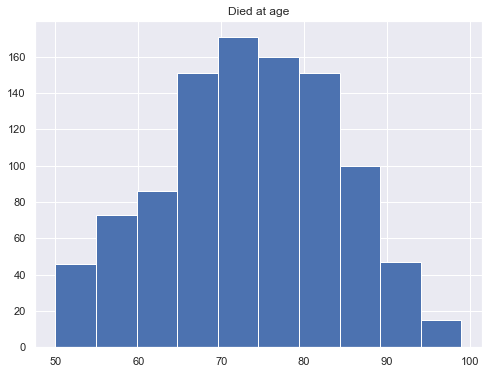

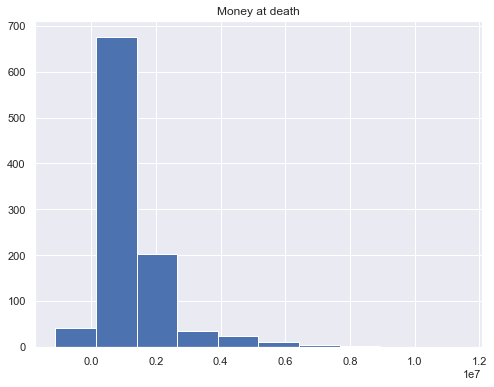

In [240]:
died_at_age = []
money_at_death = []
for i in range(1000):
    age, money = single_Mae_process()
    died_at_age.append(age)
    money_at_death.append(money)


plt.figure(figsize=(8,6))
plt.hist(died_at_age)
plt.title('Died at age')
plt.show()

plt.figure(figsize=(8,6))
plt.hist(money_at_death)
plt.title('Money at death')
plt.show()